In [140]:
import pandas as pd
import numpy as np
import sklearn
import math
import matplotlib.pyplot as plt

In [141]:
df = pd.read_csv('model_data.csv')

In [142]:
df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS,Veteran Value,VV Class,Player Level
0,1,1997,Vinny Del,SG,30.0,SAS,72.0,2243.0,14.4,0.529,...,-2.3,0.314,0.501,0.868,-8.8,4.4,3.7,2903.225806,0,0
1,3,1997,Avery Johnson,PG,31.0,SAS,76.0,2472.0,15.0,0.517,...,-3.0,0.231,0.487,0.690,-8.8,4.4,6.7,14558.823529,0,0
2,7,1997,Charles Barkley,PF,33.0,HOU,53.0,2009.0,23.0,0.581,...,2.8,0.283,0.569,0.694,4.7,-0.9,8.6,14.000000,0,2
3,8,1997,Clyde Drexler,SG,34.0,HOU,62.0,2271.0,19.9,0.548,...,1.7,0.355,0.493,0.750,4.7,-0.9,6.8,7.423895,0,2
4,9,1997,Mario Elie,SF,33.0,HOU,78.0,2687.0,14.3,0.662,...,0.1,0.420,0.572,0.896,4.7,-0.9,3.8,2.079266,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1409,2020,Dwight Howard,C,34.0,LAL,69.0,1306.0,18.7,0.696,...,1.2,0.600,0.732,0.514,5.6,5.5,4.0,0.068878,0,0
812,1410,2020,LeBron James,PG,35.0,LAL,67.0,2316.0,25.5,0.577,...,1.8,0.348,0.564,0.693,5.6,2.9,5.6,1.125000,0,3
813,1412,2020,Justin Holiday,SG,30.0,IND,73.0,1826.0,12.1,0.585,...,1.8,0.405,0.477,0.791,1.9,0.1,3.1,3.617225,0,1
814,1416,2020,Paul Millsap,PF,34.0,DEN,51.0,1240.0,16.9,0.591,...,-0.2,0.435,0.500,0.816,2.2,4.8,3.2,-1012.987013,1,0


In [143]:
df[df['Player']=='Ray Allen']

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS,Veteran Value,VV Class,Player Level
344,608,2006,Ray Allen,SG,30.0,SEA,78.0,3022.0,22.2,0.590,...,-3.1,0.412,0.486,0.903,-3.3,-3.0,6.3,-306.220096,1,2
375,659,2007,Ray Allen,SG,31.0,SEA,55.0,2219.0,21.6,0.564,...,-2.1,0.372,0.479,0.903,-3.0,10.8,9.7,24825.396825,0,1
407,721,2008,Ray Allen,SG,32.0,BOS,73.0,2624.0,16.4,0.584,...,-0.1,0.398,0.485,0.907,10.8,7.9,11.1,387.552501,0,2
440,775,2009,Ray Allen,SG,33.0,BOS,79.0,2876.0,17.3,0.624,...,-0.3,0.409,0.542,0.952,7.9,3.7,7.9,1.844146,0,2
472,826,2010,Ray Allen,SG,34.0,BOS,80.0,2819.0,15.2,0.601,...,-0.7,0.363,0.556,0.913,3.7,5.7,10.0,1436.879918,0,1
506,883,2011,Ray Allen,SG,35.0,BOS,80.0,2890.0,16.4,0.615,...,0.4,0.444,0.520,0.881,5.7,2.6,4.7,1.026150,0,1
540,939,2012,Ray Allen,SG,36.0,BOS,46.0,1565.0,14.8,0.607,...,0.3,0.453,0.463,0.915,2.6,8.2,5.4,3207.855974,0,1
573,987,2013,Ray Allen,SG,37.0,MIA,79.0,2035.0,14.7,0.599,...,-1.5,0.419,0.480,0.886,8.2,5.1,4.1,1.570356,0,1


## Pre-Processing

In [144]:
df.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', '3P%', '2P%',
       'FT%', 'TmNetRtg', 'Next Rtg', 'Next WS', 'Veteran Value', 'VV Class',
       'Player Level'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

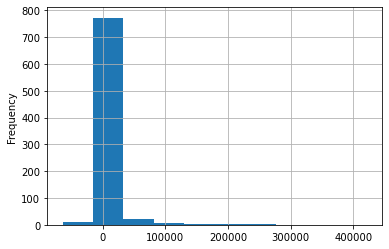

In [145]:
df['Veteran Value'].plot.hist(grid=True)

In [146]:
# calculate summary statistics
data = df['Veteran Value']
data_mean, data_std = np.mean(data), np.std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print(lower, upper)
lower, upper = -25000,25000

-74607.01582586917 84025.5152860762


In [147]:
outliers = [x[0] for x in enumerate(df['Veteran Value']) if x[1] < lower or x[1] > upper]
outliers

[17,
 22,
 25,
 100,
 110,
 116,
 141,
 142,
 150,
 153,
 198,
 207,
 238,
 259,
 269,
 272,
 280,
 295,
 312,
 333,
 373,
 425,
 432,
 466,
 467,
 468,
 561,
 564,
 588,
 602,
 613,
 618,
 625,
 655,
 663,
 664,
 681,
 684,
 686,
 695,
 697,
 728,
 732,
 751,
 785,
 798,
 799,
 803]

In [148]:
df.drop(index=outliers,inplace=True)

<AxesSubplot:ylabel='Frequency'>

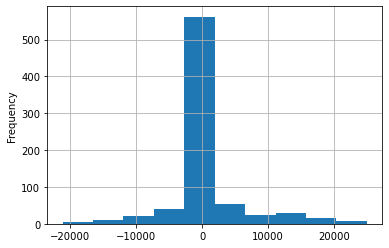

In [149]:
df['Veteran Value'].plot.hist(grid=True)

[  4.   9.  20.  41. 562.  55.  25.  28.  16.   8.] [-21078.43137255 -16481.0392804  -11883.64718825  -7286.2550961
  -2688.86300395   1908.5290882    6505.92118035  11103.3132725
  15700.70536465  20298.0974568   24895.48954895]


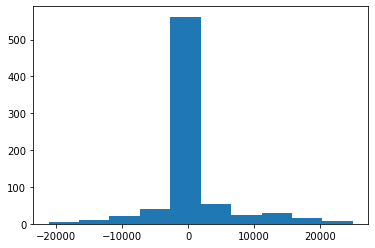

In [150]:
n, bins, patches = plt.hist(df['Veteran Value'])
print(n,bins)

In [151]:
def findPercentile(veteran_values, num_classes):
    percentiles = []
    inc = 100 / num_classes
#     percentiles = [0]
    start = inc
    for _ in range(num_classes-1):
        percentiles.append(np.percentile(veteran_values, start))

        start += inc
#     percentiles.append(100)
    return percentiles

In [152]:
percentiles = findPercentile(df['Veteran Value'],5)
percentiles

[-275.30838514820164,
 1.6367619047619055,
 7.144318181818179,
 1335.3328173374618]

In [153]:
target = df['Veteran Value']

def getClass(vv):
    if vv < percentiles[0]:
        return 0
    elif percentiles[0] <= vv < percentiles[1]:
        return 1
    elif percentiles[1] <= vv < percentiles[2]:
        return 2
    elif percentiles[2] <= vv < percentiles[3]:
        return 3
    elif percentiles[3] < vv:
        return 4

    
df['VV Class'] = [getClass(vv) for vv in df['Veteran Value']]
target_class = df['VV Class']

In [154]:
df['Veteran Value'].describe()

count      768.000000
mean       867.630702
std       5419.122856
min     -21078.431373
25%          0.000000
50%          2.818490
75%        516.900048
max      24895.489549
Name: Veteran Value, dtype: float64

In [155]:
df.drop(['Unnamed: 0','Age','Year','Player','Pos','Tm','Next WS','WS','Next Rtg','TmNetRtg','Veteran Value', 'VV Class'], axis=1, inplace=True)

In [156]:
df.columns

Index(['G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', '3P%',
       '2P%', 'FT%', 'Player Level'],
      dtype='object')

In [192]:
#try scaling values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [158]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import StackingClassifier

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True)

clf = LogisticRegression(tol=1e-4, max_iter=1000, random_state=0)
n_neighbors = 15
neigh = KNeighborsClassifier(n_neighbors)
rf = RandomForestClassifier(n_estimators=270, max_depth=50, min_samples_leaf=10, min_samples_split = 10,verbose=False)
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=2**6, max_depth=10), 
                             n_estimators=250, learning_rate=0.5)
mlpc = MLPClassifier(hidden_layer_sizes=(1000,200,30,5),activation='relu',learning_rate_init=0.001,batch_size=256,max_iter=400,verbose=False)

estimator = [] 
estimator.append(('RFC',rf))
estimator.append(('ABC',abc))
estimator.append(('MLP',mlpc))
estimator.append(('LRC',clf))
estimator.append(('KNC',neigh))
vot_soft = VotingClassifier(estimators = estimator, voting='soft', verbose=False) 

temp = []
models = [clf,neigh,rf,abc,mlpc,vot_soft]
for m in models:
    cv_results = cross_validate(m, scaled_data, target_class, cv=kf, scoring='roc_auc_ovr', return_train_score=False)
    temp.append(cv_results)


In [159]:
scores = []
for i in temp:
    scores.append(np.average(i['test_score']))
scores


[0.6554199197927716,
 0.5887049923024863,
 0.6330202367274407,
 0.5874647169054927,
 0.5584164175654993,
 0.6359034643134306]

In [160]:
rf.fit(scaled_data,target_class)

RandomForestClassifier(max_depth=50, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=270, verbose=False)

In [161]:
rf.predict_proba(scaled_data)

array([[0.1328964 , 0.21202655, 0.2583871 , 0.18865233, 0.20803762],
       [0.47509559, 0.21545803, 0.13222368, 0.09634444, 0.08087826],
       [0.14132341, 0.19323056, 0.15281537, 0.35850535, 0.15412531],
       [0.15287547, 0.33966252, 0.17083663, 0.16771951, 0.16890587],
       [0.19396101, 0.20378425, 0.40738895, 0.14043763, 0.05442815],
       [0.13632641, 0.06311227, 0.07565785, 0.15347579, 0.57142769],
       [0.20037451, 0.08391068, 0.13157028, 0.19100334, 0.39314119],
       [0.27833705, 0.1771172 , 0.26454358, 0.16679121, 0.11321096],
       [0.35706923, 0.23498092, 0.13612958, 0.15164638, 0.1201739 ],
       [0.3481024 , 0.1758054 , 0.25476252, 0.1295577 , 0.09177198],
       [0.17923429, 0.21811786, 0.20337477, 0.28089116, 0.11838192],
       [0.10424162, 0.11086733, 0.10166865, 0.15174854, 0.53147386],
       [0.24755973, 0.35213028, 0.21762117, 0.12596524, 0.05672358],
       [0.32362349, 0.1719239 , 0.20057613, 0.1763784 , 0.12749807],
       [0.15112287, 0.10407513, 0.

In [163]:
metrics.roc_auc_score(target_class,rf.predict_proba(scaled_data),multi_class='ovr')

0.9353593492419264

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

xtrain, xtest, ytrain, ytest = train_test_split(scaled_data, target_class.values, random_state=42,test_size=0.1)

### Logistic Regression Classifier

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression(tol=1e-4, max_iter=1000, random_state=0).fit(xtrain, ytrain)
clf.predict(xtest)
clf.predict_proba(xtest)
scores = cross_val_score(clf, xtest, ytest, cv=5)
print(scores.mean())

0.33827956989247315


In [88]:
metrics.roc_auc_score(ytest,clf.predict_proba(xtest),multi_class='ovr')

0.6712882301350168

### KNN Classifier

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

n_neighbors=15
neigh = KNeighborsClassifier(n_neighbors)
neigh.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=15)

In [90]:
metrics.roc_auc_score(ytest,neigh.predict_proba(xtest),multi_class='ovr')

0.5732780211967126

### Random Forests Classifier

In [194]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=270, max_depth=50, min_samples_leaf=10, min_samples_split = 10,verbose=False)
rf.fit(xtrain, ytrain)
rf.predict_proba(xtest)

array([[0.12833916, 0.21952875, 0.15946895, 0.21959129, 0.27307186],
       [0.34510217, 0.26044754, 0.16325025, 0.11245832, 0.11874172],
       [0.18456659, 0.21859791, 0.17190033, 0.24070002, 0.18423516],
       [0.19806552, 0.25913034, 0.17217681, 0.15881119, 0.21181613],
       [0.17538908, 0.21971506, 0.31909277, 0.21058095, 0.07522215],
       [0.14841641, 0.07554994, 0.08482029, 0.1905102 , 0.50070316],
       [0.13943262, 0.07632312, 0.14146477, 0.19276478, 0.45001471],
       [0.29990417, 0.19559923, 0.17784556, 0.18723917, 0.13941186],
       [0.25882787, 0.28459834, 0.16911546, 0.17605278, 0.11140554],
       [0.37377047, 0.20143331, 0.16638034, 0.15812107, 0.10029481],
       [0.18924825, 0.26157194, 0.21202625, 0.20426892, 0.13288464],
       [0.12722313, 0.10753291, 0.14232539, 0.18931002, 0.43360856],
       [0.2985797 , 0.22702217, 0.26640792, 0.14026375, 0.06772646],
       [0.20630372, 0.19139787, 0.23147401, 0.20646046, 0.16436394],
       [0.19010001, 0.13731673, 0.

In [195]:
metrics.roc_auc_score(ytest,rf.predict_proba(xtest),multi_class='ovr')

0.716550156360382

### Boosted Classifier


In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=2**6, max_depth=10), 
                         n_estimators=250, learning_rate=0.5)
abc.fit(xtrain, ytrain)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         min_samples_split=64),
                   learning_rate=0.5, n_estimators=250)

In [94]:
metrics.roc_auc_score(ytest,abc.predict_proba(xtest),multi_class='ovr')

0.6220571117313153

### Neural Network

In [95]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(hidden_layer_sizes=(1000,200,30,5),activation='relu',learning_rate_init=0.001,batch_size=256, verbose=False,max_iter=400)
mlpc.fit(xtrain, ytrain)

MLPClassifier(batch_size=256, hidden_layer_sizes=(1000, 200, 30, 5),
              max_iter=400)

In [96]:
metrics.roc_auc_score(ytest,mlpc.predict_proba(xtest),multi_class='ovr')

0.6157002562485078

### Voting Classifier

In [97]:
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import StackingClassifier

estimator = [] 
estimator.append(('RFC',rf))
estimator.append(('LRC',clf))
estimator.append(('ABC',abc))
estimator.append(('MLP',mlpc))
estimator.append(('KNC',neigh))

vot_soft = VotingClassifier(estimators = estimator, voting='soft', verbose=False) 
vot_soft.fit(xtrain, ytrain)


[Voting] ...................... (1 of 5) Processing RFC, total=   1.1s
[Voting] ...................... (2 of 5) Processing LRC, total=   0.7s
[Voting] ...................... (3 of 5) Processing ABC, total=   3.7s
[Voting] ...................... (4 of 5) Processing MLP, total=  39.0s
[Voting] ...................... (5 of 5) Processing KNC, total=   0.0s


VotingClassifier(estimators=[('RFC',
                              RandomForestClassifier(max_depth=50,
                                                     min_samples_leaf=10,
                                                     min_samples_split=10,
                                                     n_estimators=270,
                                                     verbose=False)),
                             ('LRC',
                              LogisticRegression(max_iter=1000,
                                                 random_state=0)),
                             ('ABC',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                                                       min_samples_split=64),
                                                 learning_rate=0.5,
                                                 n_estimators=250)),
                             ('MLP',
                

In [98]:
metrics.roc_auc_score(ytest,vot_soft.predict_proba(xtest),multi_class='ovr')

0.635627818107307

## Test on Veterans of 2021-2022 Season

Data Cleaning for NBA 2021-2022

In [99]:
import pandas as pd
import numpy as np
data = pd.read_csv('compiled.csv')

In [100]:
data2 = data[data['Year']==2021]
data2 = data2.copy()

In [101]:
data2

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg
1423,2021,Carmelo Anthony,PF,36.0,POR,69.0,1690.0,14.6,0.547,0.418,...,1.7,0.8,2.6,0.073,0.1,-1.6,0.409,0.429,0.890,1.8
1424,2021,Robert Covington,PF,30.0,POR,70.0,2243.0,11.2,0.553,0.699,...,1.4,2.4,3.7,0.080,-1.5,1.2,0.379,0.451,0.806,1.8
1425,2021,Damian Lillard,PG,30.0,POR,67.0,2398.0,25.6,0.623,0.528,...,9.6,0.8,10.4,0.209,7.4,-1.6,0.391,0.519,0.928,1.8
1426,2021,Will Barton,SF,30.0,DEN,56.0,1736.0,11.8,0.538,0.423,...,0.7,1.5,2.2,0.061,-0.8,-1.2,0.381,0.459,0.785,4.8
1427,2021,JaMychal Green,PF,30.0,DEN,58.0,1120.0,13.6,0.590,0.529,...,1.4,1.2,2.6,0.110,-0.4,-1.6,0.399,0.534,0.807,4.8
1428,2021,Paul Millsap,PF,35.0,DEN,56.0,1162.0,16.4,0.565,0.357,...,1.7,1.6,3.2,0.133,0.4,0.1,0.343,0.550,0.724,4.8
1429,2021,Nicolas Batum,SF,32.0,LAC,67.0,1835.0,12.9,0.617,0.660,...,2.7,2.3,5.0,0.132,0.5,1.0,0.404,0.579,0.828,6.1
1430,2021,Paul George,SF,30.0,LAC,54.0,1821.0,20.5,0.598,0.437,...,3.0,2.3,5.3,0.139,4.0,-0.4,0.411,0.510,0.868,6.1
1431,2021,Reggie Jackson,SG,30.0,LAC,67.0,1544.0,14.2,0.576,0.482,...,2.3,1.4,3.7,0.115,0.5,-0.5,0.433,0.465,0.817,6.1
1432,2021,Marcus Morris,PF,31.0,LAC,57.0,1502.0,14.5,0.614,0.507,...,2.1,1.5,3.6,0.115,0.9,-1.0,0.473,0.472,0.820,6.1


In [102]:
starter = data2.loc[(data2['WS/48']>=0.1) & (data2['MP']/data2['G']>25),'Player']
all_star = data2.loc[(data2['WS/48']>=0.15) & (data2['MP']/data2['G']>30) & (data2['USG%'] > 20),'Player']
super_star = data2.loc[(data2['WS/48']>=0.15) & (data2['MP']/data2['G']>30) & (data2['USG%'] > 30),'Player']
player_level = []
for p in data2['Player']:
    if p in list(super_star):
        player_level.append(3)
    elif p in list(all_star) and p not in list(super_star):
        player_level.append(2)
    elif p in list(starter) and p not in list(super_star) and p not in list(all_star):
        player_level.append(1)
    else:
        player_level.append(0)
data2['Player Level'] = player_level


In [103]:
data2_copy = data2.copy()
data2.drop(['Age','Year','Player','Pos','Tm','WS','TmNetRtg'], axis=1, inplace=True)
len(data2.columns)

22

In [196]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data2)

In [197]:
vv21 = rf.predict(scaled_data)

In [198]:
from collections import defaultdict
preds = defaultdict(list)
for t in zip(data2_copy['Player'], vv21,data2_copy['Player Level']):
    preds[t[2]].append(tuple((t[0], t[1])))
preds = sorted(preds.items(),key=lambda x: (x[1][1],x[0]),reverse=True)
for i in preds:
    print(i,'\n')

'''
for k,v in preds.items():
    print(k,":",v)
    print('\n')
'''

(3, [('Damian Lillard', 0), ('Stephen Curry', 1), ('LeBron James', 3)]) 

(0, [('Carmelo Anthony', 1), ('Robert Covington', 3), ('Will Barton', 4), ('JaMychal Green', 4), ('Paul Millsap', 4), ('Reggie Jackson', 1), ('Kent Bazemore', 4), ('Eric Bledsoe', 1), ('Goran Dragiƒá', 4), ('Andre Iguodala', 4), ('Dwight Howard', 1), ('Rudy Gay', 4), ('Patty Mills', 1), ('Wayne Ellington', 4), ('Danilo Gallinari', 4), ('Justin Holiday', 3), ('Wesley Matthews', 4), ('Markieff Morris', 4), ('Robin Lopez', 0), ('Russell Westbrook', 4), ('Ricky Rubio', 4), ('Garrett Temple', 4), ('Thaddeus Young', 1), ('John Wall', 4)]) 

(1, [('Nicolas Batum', 2), ('Paul George', 3), ('Marcus Morris', 4), ('Draymond Green', 1), ('Bojan Bogdanoviƒá', 1), ('Mike Conley', 4), ('Joe Ingles', 1), ('Seth Curry', 2), ('Danny Green', 1), ('Mason Plumlee', 3), ('Brook Lopez', 2), ('Kyle Lowry', 4), ('Nikola Vuƒçeviƒá', 3), ('Kemba Walker', 4)]) 

(2, [('Jimmy Butler', 3), ('DeMar DeRozan', 0), ('Jrue Holiday', 3)]) 



'\nfor k,v in preds.items():\n    print(k,":",v)\n    print(\'\n\')\n'

In [199]:
with open('results.txt', 'a') as file:
    for i in preds:
        file.write(str(i))
        file.write('\n')
    file.write('\n')
    file.close()